dataset/nsddata/ppdata/subj01/func1pt8mm/mean.nii.gz brain volume and map/transform it into the same space as sub-01_ses-nsd01_task-nsdcore_run-01_bold.nii.gz

then use that transformation matrix and apply it to the func1pt8mm nsdgeneral mask

this should give you the mask you need

In [2]:
path = "/scratch/gpfs/rk1593/rt_mindEye/masking_operation"
!module load fsl/6.0.6.2 
import os
import nibabel as nib
import numpy as np
import nilearn
from nilearn import plotting
from nilearn import image
from matplotlib import pyplot as plt

flirt is the main program that performs affine registration. The main options are: an input (-in) and a reference (-ref) volume; the calculated affine transformation that registers the input to the reference which is saved as a 4x4 affine matrix (-omat); and output volume (-out) where the transform is applied to the input volume to align it with the reference volume. In addition, FLIRT can also be used to apply a saved transformation to a volume (-applyxfm, -init and -out) or to apply a transform that aligns the NIFTI mm coordinates (-applyxfm, -usesqform and -out; but not -init). For these usages the reference volume must still be specified as this sets the voxel and image dimensions of the resulting volume.

-out outvol -init invol2refvol.mat -applyxfm

# Day 1 Mask

In [3]:
# # map mean.nii.gz to sub-01 bold image and make affine
# os.system(f"flirt -in /scratch/gpfs/rk1593/rt_mindEye/masking_operation/mean.nii.gz " + 
#           "-ref /scratch/gpfs/rk1593/rt_mindEye/masking_operation/sub-01_ses-nsd01_task-nsdcore_run-01_bold.nii.gz " +
#           "-omat /scratch/gpfs/rk1593/rt_mindEye/masking_operation/affine_day1_subj1")
# # use affine for transforming the mask to the bold image space
# os.system(f"flirt -in /scratch/gpfs/rk1593/rt_mindEye/masking_operation/nsdgeneral.nii.gz " + 
#           "-ref /scratch/gpfs/rk1593/rt_mindEye/masking_operation/sub-01_ses-nsd01_task-nsdcore_run-01_bold.nii.gz "  +
#           "-init /scratch/gpfs/rk1593/rt_mindEye/masking_operation/affine_day1_subj1 " + 
#           "-out /scratch/gpfs/rk1593/rt_mindEye/masking_operation/nsdgeneral_transformed_day1_subj1.nii.gz -applyxfm")


0

FLIRT can also be used to apply a saved transformation to a volume (-applyxfm, -init and -out)

In [14]:
# make sure affine of bold image and the transformed mask are the same
ref = nib.load('/scratch/gpfs/rk1593/rt_mindEye/masking_operation/sub-01_ses-nsd01_task-nsdcore_run-01_bold.nii.gz')
mask_nii = nib.load('/scratch/gpfs/rk1593/rt_mindEye/masking_operation/nsdgeneral_transformed_day1_subj1.nii.gz')
print(mask_nii.affine == ref.affine)


[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


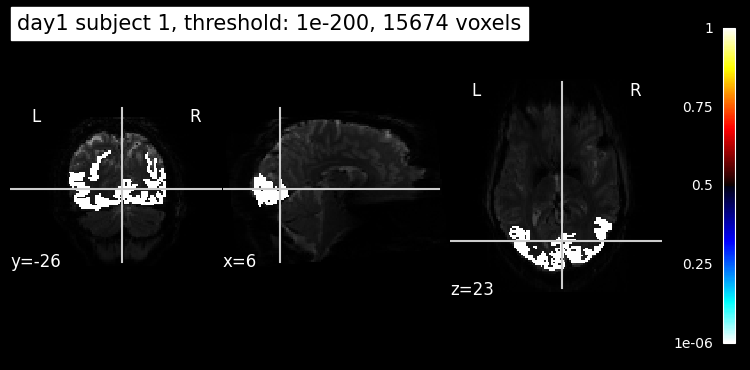

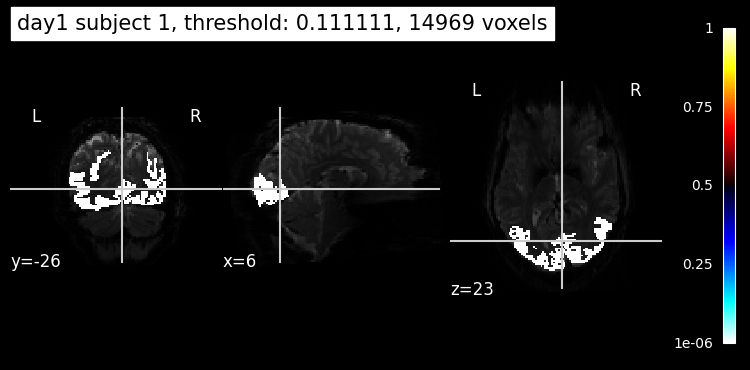

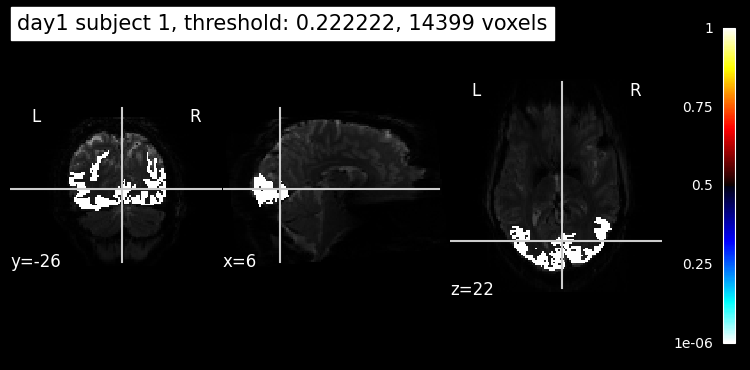

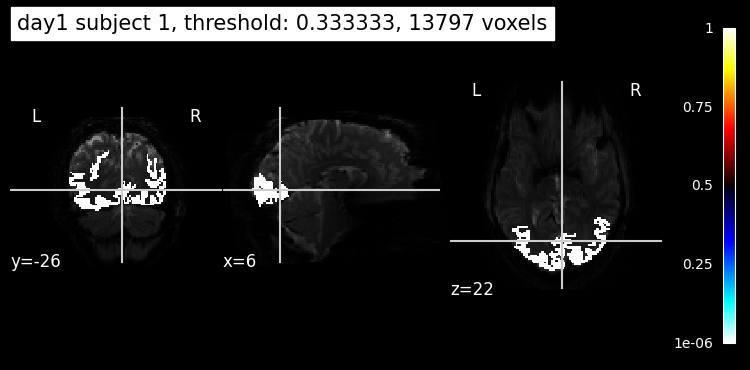

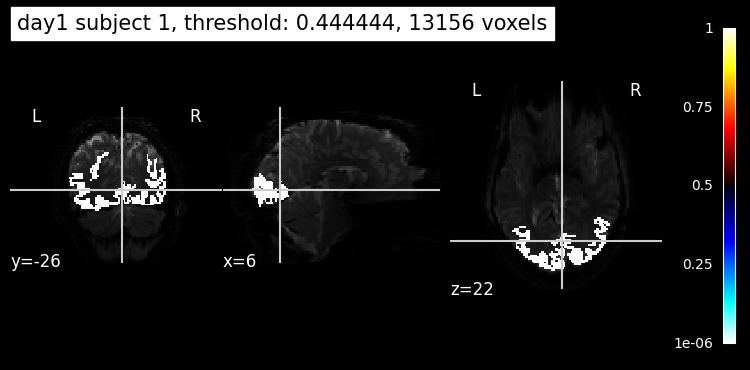

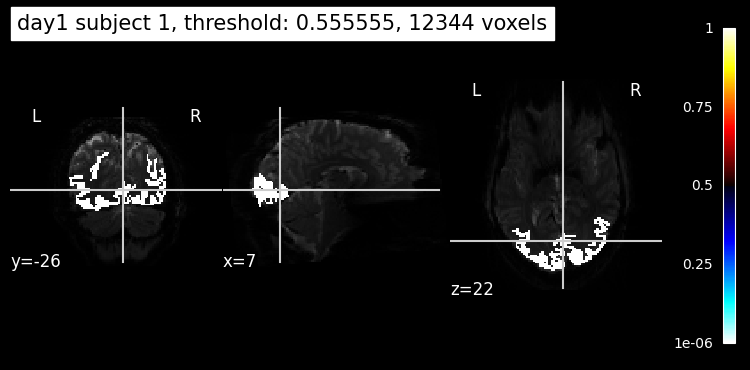

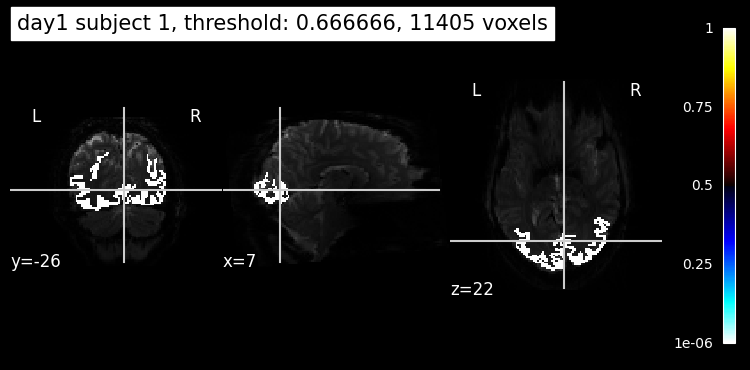

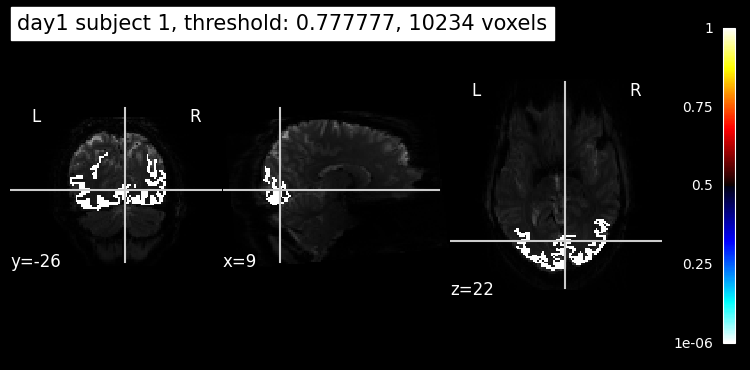

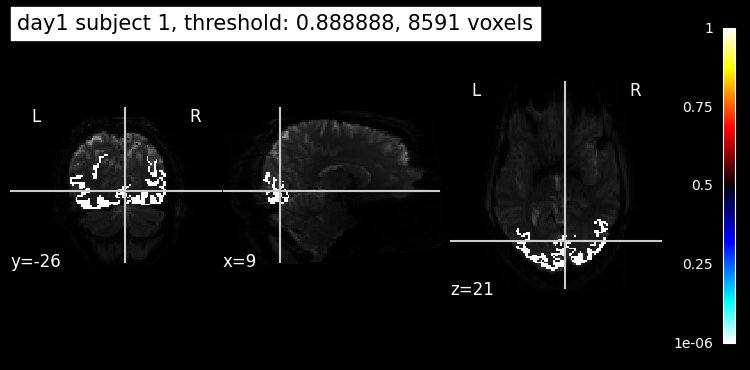

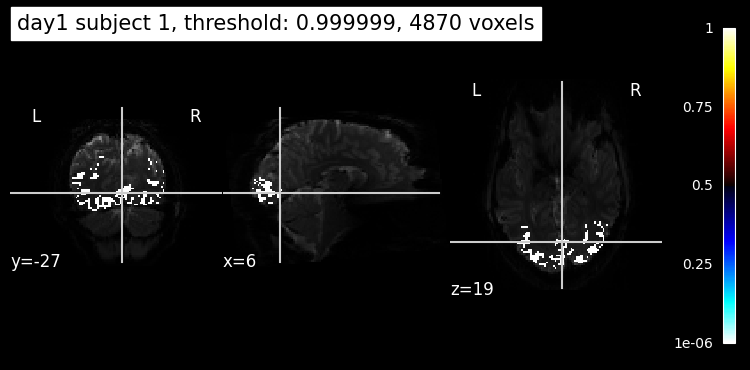

In [15]:
#  get mask of various threshold and plot
threshold_list = np.linspace(1e-200,0.999999, 10)
for threshold in threshold_list:
    mask_nii = nib.load('/scratch/gpfs/rk1593/rt_mindEye/masking_operation/nsdgeneral_transformed_day1_subj1.nii.gz')
    mask_np = mask_nii.get_fdata()
    mask_np[np.where(mask_np < threshold)] = 0 
    mask_np[np.where(mask_np >= threshold)] = 1
    num_voxels = np.unique(mask_np, return_counts = True)[1][1]
    new_mask = nib.Nifti1Image(mask_np.astype(float), mask_nii.affine)
    nib.save(new_mask, f'/scratch/gpfs/rk1593/rt_mindEye/masking_operation/thresholded_masks/day1_subj1/mask_transformed_{threshold:.10f}_day1_subj1.nii.gz')
    nilearn.plotting.plot_stat_map(new_mask, nilearn.image.new_img_like(ref_niimg = ref, \
                                   data = ref.get_fdata()[:,:,:,-1], copy_header=True), \
                                   title = f'day1 subject 1, threshold: {threshold}, {num_voxels} voxels')
    plt.show()

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

# Day 2 mask

In [13]:
# map mean.nii.gz to sub-01 bold image and make affine
os.system(f"flirt -in /scratch/gpfs/rk1593/rt_mindEye/masking_operation/mean.nii.gz " + 
          "-ref /scratch/gpfs/rk1593/rt_mindEye/masking_operation/sub-01_ses-nsd02_task-nsdcore_run-01_bold.nii.gz " +
          "-omat /scratch/gpfs/rk1593/rt_mindEye/masking_operation/affine_day2_subj1")
# use affine for transforming the mask to the bold image space
os.system(f"flirt -in /scratch/gpfs/rk1593/rt_mindEye/masking_operation/nsdgeneral.nii.gz " + 
          "-ref /scratch/gpfs/rk1593/rt_mindEye/masking_operation/sub-01_ses-nsd02_task-nsdcore_run-01_bold.nii.gz "  +
          "-init /scratch/gpfs/rk1593/rt_mindEye/masking_operation/affine_day2_subj1 " + 
          "-out /scratch/gpfs/rk1593/rt_mindEye/masking_operation/nsdgeneral_transformed_day2_subj1.nii.gz -applyxfm")


0

In [11]:
# make sure affine of bold image and the transformed mask are the same
ref_day2 = nib.load('/scratch/gpfs/rk1593/rt_mindEye/masking_operation/sub-01_ses-nsd02_task-nsdcore_run-01_bold.nii.gz')
mask_nii_day2 = nib.load('/scratch/gpfs/rk1593/rt_mindEye/masking_operation/nsdgeneral_transformed_day2_subj1.nii.gz')
print(mask_nii_day2.affine == ref_day2.affine)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


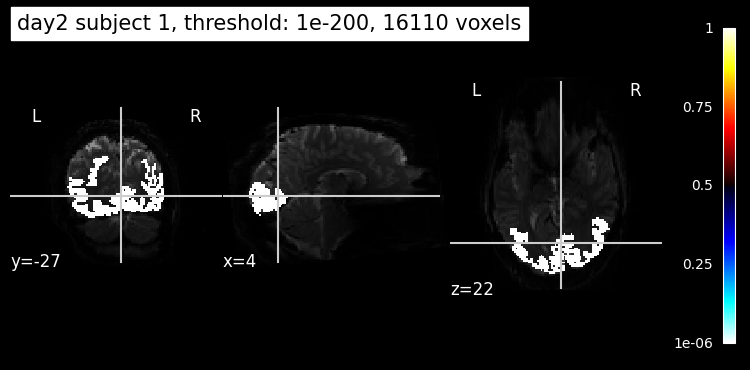

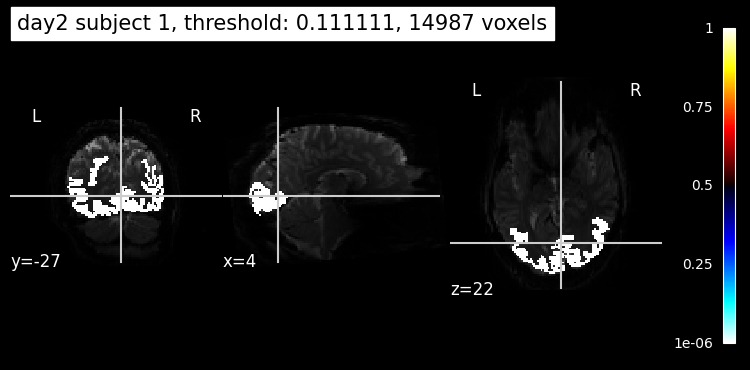

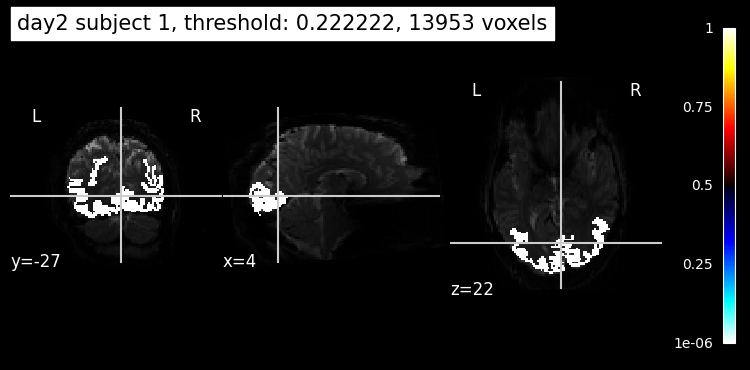

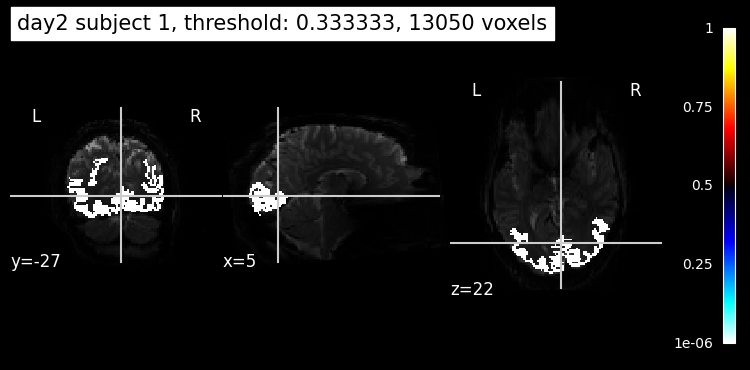

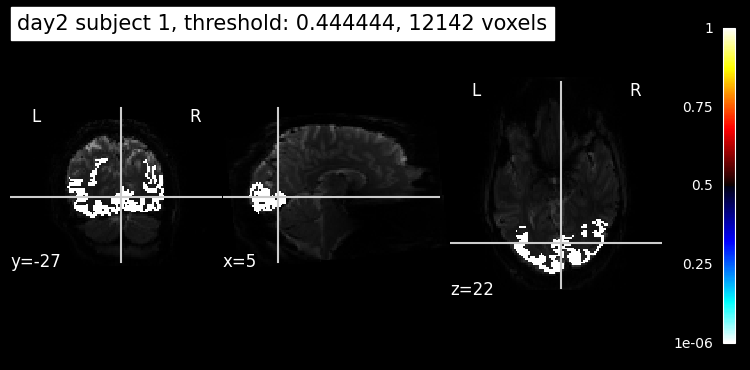

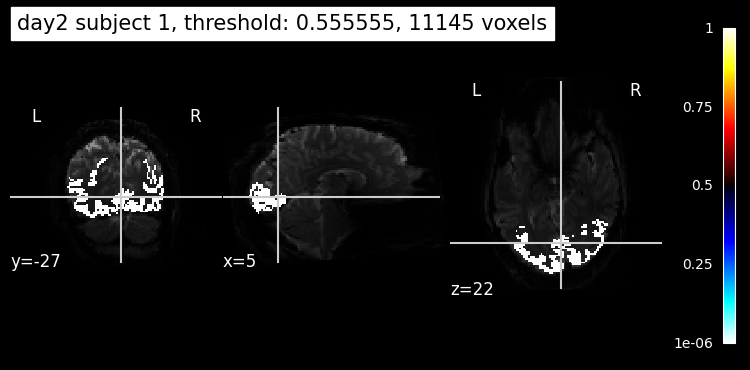

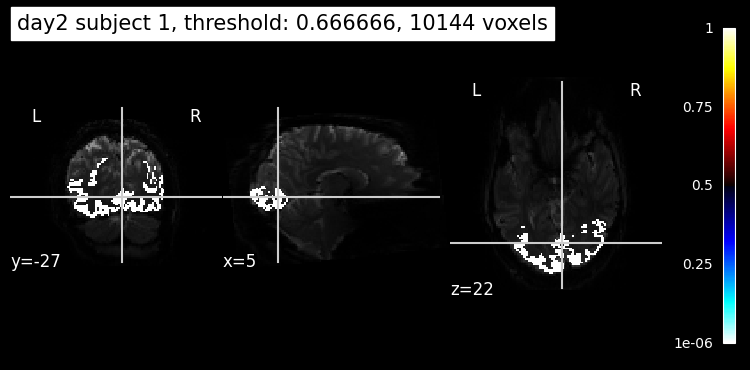

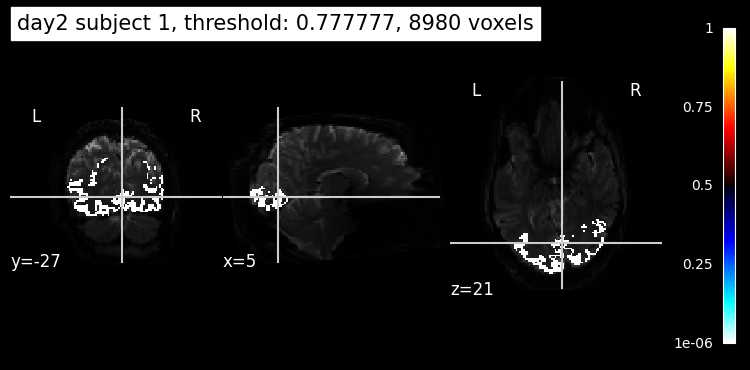

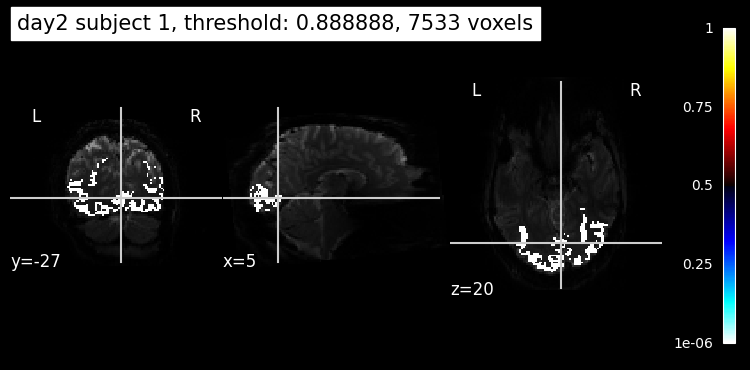

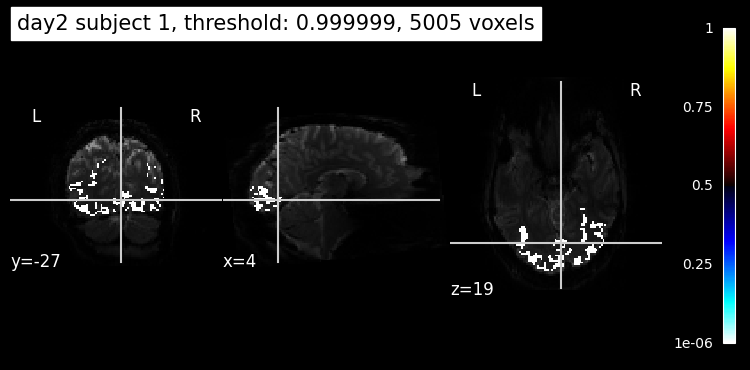

In [13]:
#  get mask of various threshold and plot
threshold_list = np.linspace(1e-200,0.999999, 10)
for threshold in threshold_list:
    mask_nii = nib.load('/scratch/gpfs/rk1593/rt_mindEye/masking_operation/nsdgeneral_transformed_day2_subj1.nii.gz')
    mask_np = mask_nii.get_fdata()
    mask_np[np.where(mask_np < threshold)] = 0 
    mask_np[np.where(mask_np >= threshold)] = 1
    num_voxels = np.unique(mask_np, return_counts = True)[1][1]
    new_mask = nib.Nifti1Image(mask_np.astype(float), mask_nii.affine)
    nib.save(new_mask, f'/scratch/gpfs/rk1593/rt_mindEye/masking_operation/thresholded_masks/day2_subj1/mask_transformed_{threshold:.10f}_day2_subj1.nii.gz')
    nilearn.plotting.plot_stat_map(new_mask, nilearn.image.new_img_like(ref_niimg = ref_day2, \
                                   data = ref_day2.get_fdata()[:,:,:,-1], copy_header=True), \
                                   title = f'day2 subject 1, threshold: {threshold}, {num_voxels} voxels')
    plt.show()